<a href="https://colab.research.google.com/github/MarahRamadan/Data-Visualization-with-Excel-and-Python-and-R/blob/main/Pie%20Chart/Cars_by_Fuel_Type_Pie_Chart_Python_%26_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #overwrite the matplotlib with style of seaborn, we'll code the graphs using matplot but displayed with seaborn

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving pie_chart_data.csv to pie_chart_data.csv
User uploaded file "pie_chart_data.csv" with length 79 bytes


In [3]:
import io

df_fuel_engine_type = pd.read_csv(io.BytesIO(uploaded['pie_chart_data.csv']),encoding= 'unicode_escape')

In [4]:
df_fuel_engine_type

,Engine Fuel Type,Number of Cars
0,Diesel,2019
1,Gas,613
2,Other,154
3,Petrol,1559


In [9]:
sns.set_palette('colorblind')

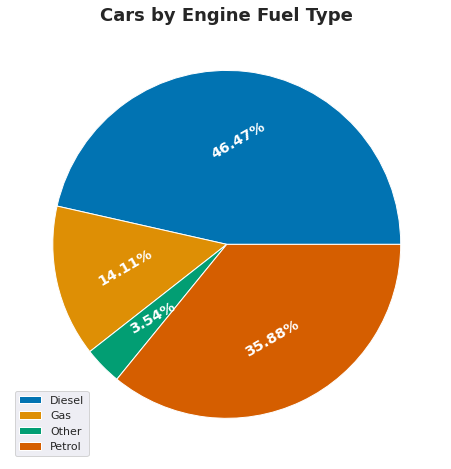

In [14]:
plt.figure(figsize = (10,8))
plt.pie(df_fuel_engine_type['Number of Cars'],
        labels = df_fuel_engine_type['Engine Fuel Type'].values,
        autopct='%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold',
                      'rotation' : '30',
                     'color' : 'w'})
plt.legend()
plt.title('Cars by Engine Fuel Type', fontsize = 18 , fontweight='bold')
plt.show()

Export vis as image

In [15]:
plt.savefig("Cars by Engine Fuel Type.png")

<Figure size 432x288 with 0 Axes>

## Use R and Python together in Colab

In [16]:
%load_ext rpy2.ipython

In [17]:
%%R
library("ggplot2")

In [19]:
%%R
df_fuel_types_r <- read.csv('pie_chart_data.csv', header= TRUE, sep=",")
df_fuel_types_r

  Engine.Fuel.Type Number.of.Cars
1           Diesel           2019
2              Gas            613
3            Other            154
4           Petrol           1559


In [30]:
%%R
pie_chart <- ggplot(df_fuel_types_r,
                    aes(x = "",
                    y= Number.of.Cars,
                    fill = Engine.Fuel.Type))+
                    geom_bar(stat = "identity",
                             width = 1) +
                    coord_polar("y")  # transformation into polar coordinates. This is the step which transforms our stacked bar into a pie chart

# Adding labels to the pie chart.
# Labels as strings in the form of percent of the total.
percentages <- paste0(round(df_fuel_types_r$Number.of.Cars/sum(df_fuel_types_r$Number.of.Cars)*100, 1),"%")   
pie_chart <- pie_chart + geom_text(aes(label = percentages),
                                   position = position_stack(vjust = 0.5))                 

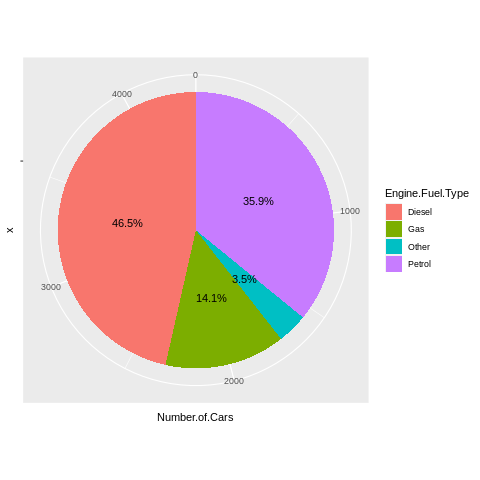

In [31]:
%%R
pie_chart

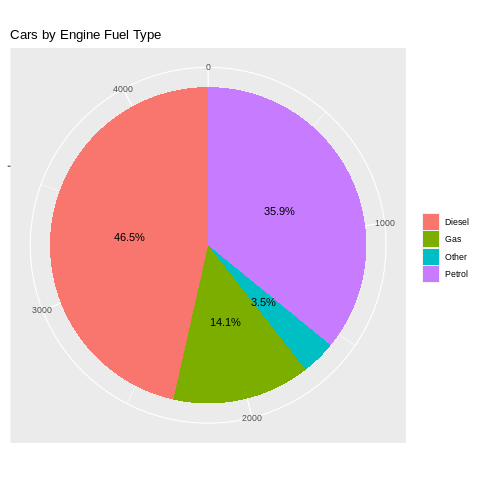

In [32]:
%%R
pie_chart <- pie_chart + labs(x = NULL,
                              y = NULL,
                              fill = NULL,
                              title = "Cars by Engine Fuel Type")
pie_chart

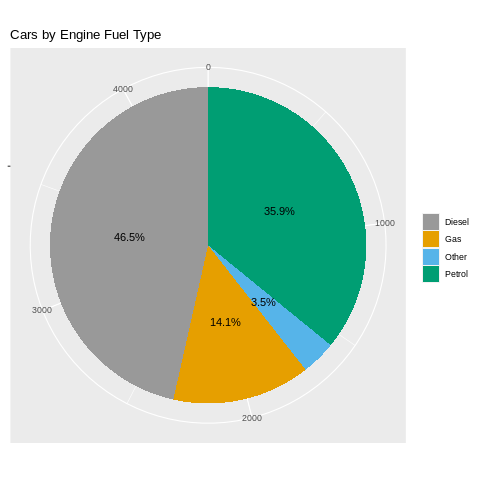

In [33]:
%%R
# Colorblind friendly palette. Color names with hex codes.
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
pie_chart <- pie_chart + scale_fill_manual (values = cbPalette)

pie_chart


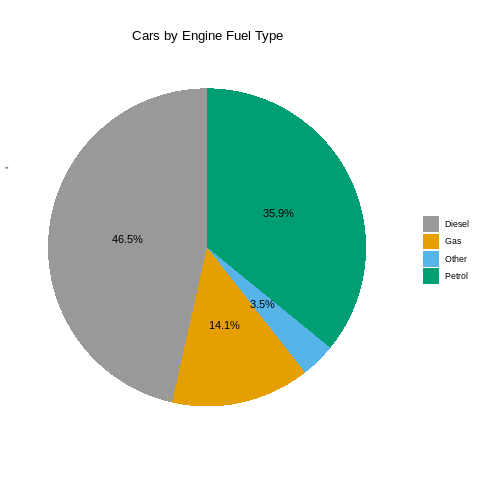

In [35]:
%%R
# Chart formatting. Adding a classic theme with a white background, instead of the default grey.
# Removing unnecessary text and line elements from the pie chart.
pie_chart <- pie_chart + theme_classic() +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        plot.title = element_text(hjust = 0.5))
pie_chart